In [1]:
%pylab inline
from pmesh.pm import ParticleMesh
from gaussianCR.construct import *
from gaussianCR.cosmo import *

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# not necessary
import astropy.cosmology as ac
import nbodykit.cosmology as nbcosmos 

## choose cosmology 

Initialize a Cosmos object by :

In [2]:
wmap9 = Cosmos(FLRW=True,obj=nbcosmos.WMAP9)

Note that obj is from astropy.cosmology or nbodykit.cosmology, need ``nbodykit`` package installed if set FLRW==True.
Alternatively, one can also intialize Cosmos obj by setting flag FLRW = Flase, and input cosmological parameters and linear power spectrum at z=0 (note that they should be consistent)

In [4]:
data = np.loadtxt('/home/yueying/source/gaussianCR/examples/ps/fdm_m2p5_z0_matterpower.dat')
pk_func = interpolate.interp1d(data[:,0],data[:,1],fill_value='extrapolate')

mycosmos = Cosmos(FLRW=False,H0=69.3,Om0=0.286,Ob0=0.0463,Pk_lin=pk_func)

## quick start 

initialize gsCR with cosmos object, boxsize, Nmesh for the dx_field, RG the kernel smoothing length, xpk the position to impose constraint, CONS to turn on the desired constraints 

In [ ]:
from pmesh.pm import ParticleMesh
from fastpm.core import leapfrog, Solver, autostages

In [52]:
fg = gsCR(wmap9,Lbox=20,Nmesh=128,RG=0.9,xpk=np.array([10,10,10]),CONS=['f0','TG'])
print (fg)

  This is a gsCR object: 
  Lbox = 20.0 Mpc/h 
  Nmesh = 128
  RG = 0.9 Mpc/h 
  Sigma0_RG = 1.82, Sigma2_RG = 1.78 
  xpk = [10 10 10] 
  CONS = ['f0', 'TG'] 
  xij_tensor_inv = 
 None 


In [32]:
pm = ParticleMesh(BoxSize=fg.attrs['Lbox'], Nmesh=[128,128,128])
Q = pm.generate_uniform_particle_grid(shift=0)
solver = Solver(pm,nbcosmos.WMAP9, B=1)

In [33]:
wn = solver.whitenoise(seed = 181170)
dlin = solver.linear(wn, lambda k: wmap9.Pk_lin(k))
dx_field = dlin.c2r().value # dx_field is the density contrast field centered at 0

In [58]:
xpk = fg.find_xpk(dx_field)
print (xpk)

[ 9.6875   7.65625 10.46875]


In [60]:
cs,peak_data = fg.read_out_c18(dx_field,rpos=xpk)

In [64]:
peak_data['v_peculiar']

array([[ 7.69304495, 28.37289775, 46.28549748]])

In [65]:
fg.xpk = xpk

In [68]:
fg.CONS = ['full']

In [70]:
fg.build_Xij_inv_matrix()

In [77]:
c_values = fg.set_c_values(nu=5,xd=3.6,a12sq=1.3,a13sq=2.1,a1=0,b1=0,p1=0,
                           vx=0,vy=0,vz=0,epsilon=58,omega=4.71,a2=np.pi,b2=0.5*np.pi,p2=0.5*np.pi)

Constrain peak parameters: 
f0:  nu = 5.0 $\sigma_0$
f1:  {f1,x = f1,y = f1,z = 0
f2:  xd = 3.6 $\sigma_2$, a12sq = 1.3, a13sq = 2.1,a1=0.00, b1=0.00, p1=0.00
vx = 0.0 km/s
vy = 0.0 km/s
vz = 0.0 km/s
TG:  epsilon = 58.0 km/s/Mpc, omega = 4.71, a2=3.14, b2=1.57, p2=1.57


In [78]:
dx_ensemble = fg.Ensemble_field(c_values)

In [79]:
dx_constraint = dx_field + dx_ensemble

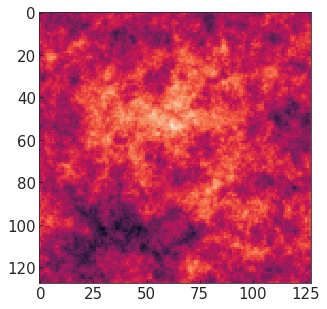

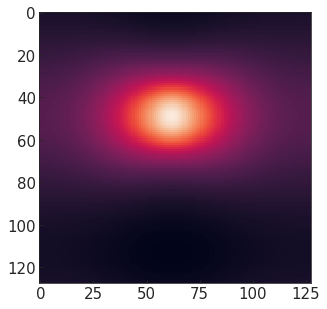

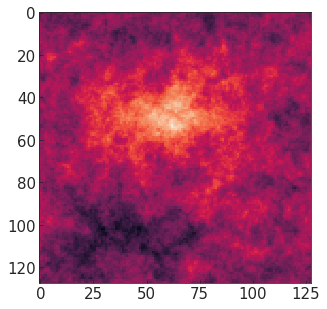

In [81]:
for dx in [dx_field,dx_ensemble,dx_constraint]:
    plt.figure(figsize=(5,5))
    den_field = np.transpose(np.sum(dx[:,:,51:83],axis=-1))
    plt.imshow(den_field)

In [41]:
fg.build_Xij_inv_matrix() # need to call whenever changed CONS
c_values = fg.set_c_values(nu=4,epsilon=60,omega=1.5*np.pi)
dx = fg.Ensemble_field(c_values)

Constrain peak parameters: 
f0:  nu = 4.0 $\sigma_0$
TG:  epsilon = 60.0 km/s/Mpc, omega = 4.71, a2=3.14, b2=0.00, p2=1.57


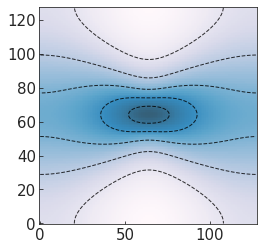

In [12]:
den_field = np.transpose(np.sum(dx,axis=-1))
plt.imshow(den_field,cmap="PuBu",origin='lower',alpha=0.8)
plt.contour(den_field,colors='black',alpha=0.8,linewidths=1,linestyles='dashed',levels=5)

In [13]:
fg.CONS = ['f0','f2']
fg.build_Xij_inv_matrix()
c_values = fg.set_c_values(nu=4,xd=3,a12sq=2)
dx = fg.Ensemble_field(c_values)

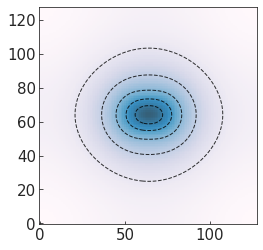

In [14]:
den_field = np.transpose(np.sum(dx,axis=-1))
plt.imshow(den_field,cmap="PuBu",origin='lower',alpha=0.8)
plt.contour(den_field,colors='black',alpha=0.8,linewidths=1,linestyles='dashed',levels=5)

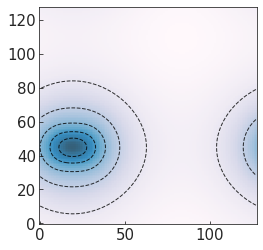

In [21]:
fg.xpk=np.array([3,7,10])

dx = fg.Ensemble_field(c_values)
den_field = np.transpose(np.sum(dx,axis=-1))
plt.imshow(den_field,cmap="PuBu",origin='lower',alpha=0.8)
plt.contour(den_field,colors='black',alpha=0.8,linewidths=1,linestyles='dashed',levels=5)

In [24]:
fg.CONS = ['f2']
fg.xpk=np.array([10,10,10])
fg.build_Xij_inv_matrix()
c_values = fg.set_c_values(xd=3,a12sq=2)
dx = fg.Ensemble_field(c_values)

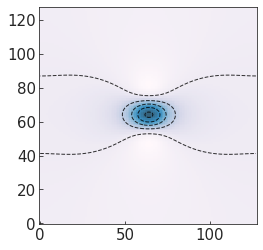

In [25]:
den_field = np.transpose(np.sum(dx,axis=-1))
plt.imshow(den_field,cmap="PuBu",origin='lower',alpha=0.8)
plt.contour(den_field,colors='black',alpha=0.8,linewidths=1,linestyles='dashed',levels=5)

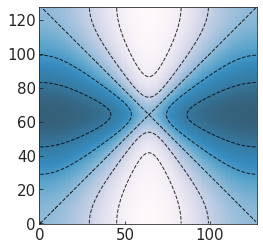

In [26]:
fg.CONS = ['TG']
fg.xpk=np.array([10,10,10])
fg.build_Xij_inv_matrix()
c_values = fg.set_c_values(epsilon=30,omega=1.5*np.pi)

dx = fg.Ensemble_field(c_values)
den_field = np.transpose(np.sum(dx,axis=-1))
plt.imshow(den_field,cmap="PuBu",origin='lower',alpha=0.8)
plt.contour(den_field,colors='black',alpha=0.8,linewidths=1,linestyles='dashed',levels=5)

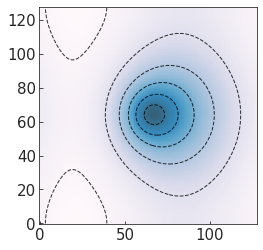

In [27]:
fg.CONS = ['f0','vx']
fg.xpk=np.array([10,10,10])
fg.build_Xij_inv_matrix()
c_values = fg.set_c_values(nu=3,vx=60)

dx = fg.Ensemble_field(c_values)
den_field = np.transpose(np.sum(dx,axis=-1))
plt.imshow(den_field,cmap="PuBu",origin='lower',alpha=0.8)
plt.contour(den_field,colors='black',alpha=0.8,linewidths=1,linestyles='dashed',levels=5)